In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import linear_model, decomposition, datasets
from sklearn import svm
import math

In [2]:
# cd D:\Group-7

In [3]:
#retrieving data
parkingdata = pd.read_csv("parking_duration_of_parking_event_vs_street_ID.csv")
parkingdata = parkingdata.sample(n = 10000)
parkingdata.size

130000

In [4]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
5774986,Rialto,COLLINS STREET,KING STREET,WILLIAM STREET,4,2053S,17/03/2012 10:35:14 AM,17/03/2012 10:36:43 AM,89,2P MTR SAT 7:30-20:30,0,528,1279
10941773,County,LONSDALE STREET,KING STREET,WILLIAM STREET,3,3238N,23/08/2012 08:09:17 AM,23/08/2012 08:15:45 AM,388,1P MTR M-F 7:30-16:00,0,894,1902
4892025,Princes Theatre,EXHIBITION STREET,LONSDALE STREET,Lt BOURKE STREET,2,482E,20/02/2012 02:43:04 PM,20/02/2012 02:55:59 PM,775,1P M-SAT 7:30-19:30,0,647,198
6092121,Hyatt,Lt COLLINS STREET,RUSSELL STREET,EXHIBITION STREET,4,2157S,27/03/2012 12:15:02 PM,27/03/2012 12:30:25 PM,923,1P MTR M-SAT 7:30-19:30,0,911,1023
7221543,Princes Theatre,LONSDALE STREET,EXHIBITION STREET,SPRING STREET,1,C2688,03/05/2012 09:23:31 AM,03/05/2012 09:31:44 AM,493,2P MTR M-SAT 7:30-20:30,0,894,1883


In [5]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
6502751,Victoria Market,QUEEN STREET,VICTORIA STREET,THERRY STREET,1,C5008,10/04/2012 09:33:40 AM,10/04/2012 10:05:25 AM,1905,1P MTR M-THU 8:00-14:30,0,1171,3372
6466762,Queensberry,ERROL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,10174E,07/04/2012 08:54:09 PM,07/04/2012 08:56:40 PM,151,LZ 30M M-SUN 00:00-23:59,0,641,3215
2053655,Hyatt,FLINDERS LANE,RUSSELL STREET,EXHIBITION STREET,4,1753S,26/11/2011 02:46:03 PM,26/11/2011 03:50:41 PM,3878,1P SAT 7:30-19:30,0,669,1400
6276906,Hardware,QUEEN STREET,Lt LONSDALE STREET,LONSDALE STREET,2,1228E,02/04/2012 07:31:58 AM,02/04/2012 07:36:07 AM,249,1P MTR M-SAT 7:30-19:30,0,1171,717
4768222,Regency,Lt LONSDALE STREET,EXHIBITION STREET,SPRING STREET,4,3339S,16/02/2012 01:15:12 PM,16/02/2012 03:23:14 PM,7682,2P MTR M-SAT 7:30-20:30,1,926,1586


## Data Wrangling

In [6]:
#checking the datatype of all the features
parkingdata.dtypes

Area Name                                 object
Street Name                               object
Between Street 1                          object
Between Street 2                          object
Side Of Street                             int64
Street Marker                             object
Arrival Time                              object
Departure Time                            object
Duration of Parking Event (in seconds)     int64
Sign                                      object
In Violation?                              int64
Street ID                                  int64
Device ID                                  int64
dtype: object

In [7]:
#Checking values of Area Name feature for typos
parkingdata['Area Name'].value_counts()

Queensberry        1014
Princes Theatre     792
Victoria Market     727
Regency             646
Southbank           646
The Mac             602
Hyatt               582
Titles              536
Rialto              475
County              465
Hardware            430
City Square         426
Chinatown           389
Magistrates         371
Banks               363
Spencer             336
Courtney            336
RACV                323
Jolimont            279
Supreme             160
Docklands            54
Tavistock            47
West Melbourne        1
Name: Area Name, dtype: int64

In [8]:
#Converting all the feature attributes to uppercase for uniformity

parkingdata['Area Name'] = parkingdata['Area Name'].str.upper()
parkingdata['Street Name'] = parkingdata['Street Name'].str.upper()
parkingdata['Between Street 1'] = parkingdata['Between Street 1'].str.upper()
parkingdata['Between Street 2'] = parkingdata['Between Street 2'].str.upper()
parkingdata['Street Marker'] = parkingdata['Street Marker'].str.upper()
parkingdata['Sign'] = parkingdata['Sign'].str.upper()

parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
5774986,RIALTO,COLLINS STREET,KING STREET,WILLIAM STREET,4,2053S,17/03/2012 10:35:14 AM,17/03/2012 10:36:43 AM,89,2P MTR SAT 7:30-20:30,0,528,1279
10941773,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,3,3238N,23/08/2012 08:09:17 AM,23/08/2012 08:15:45 AM,388,1P MTR M-F 7:30-16:00,0,894,1902
4892025,PRINCES THEATRE,EXHIBITION STREET,LONSDALE STREET,LT BOURKE STREET,2,482E,20/02/2012 02:43:04 PM,20/02/2012 02:55:59 PM,775,1P M-SAT 7:30-19:30,0,647,198
6092121,HYATT,LT COLLINS STREET,RUSSELL STREET,EXHIBITION STREET,4,2157S,27/03/2012 12:15:02 PM,27/03/2012 12:30:25 PM,923,1P MTR M-SAT 7:30-19:30,0,911,1023
7221543,PRINCES THEATRE,LONSDALE STREET,EXHIBITION STREET,SPRING STREET,1,C2688,03/05/2012 09:23:31 AM,03/05/2012 09:31:44 AM,493,2P MTR M-SAT 7:30-20:30,0,894,1883


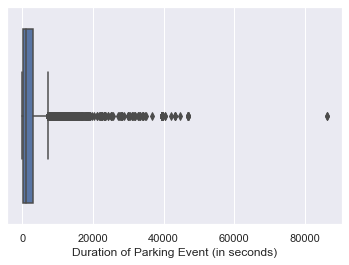

In [9]:
sns.boxplot(parkingdata['Duration of Parking Event (in seconds)'])

In [10]:
#Removing all redundant extra whitespaces
for x in parkingdata.columns:
    if parkingdata[x].dtype == object:
        parkingdata[x] = parkingdata[x].str.strip()

In [11]:
#Checking values of Street Name feature for typos
pd.set_option('display.max_rows', 10000)
parkingdata['Street Name'].value_counts()

LONSDALE STREET             966
QUEEN STREET                786
EXHIBITION STREET           614
LA TROBE STREET             565
COLLINS STREET              553
FRANKLIN STREET             536
ELIZABETH STREET            486
RUSSELL STREET              448
BOURKE STREET               444
LT LONSDALE STREET          350
FLINDERS LANE               282
KING STREET                 271
LT COLLINS STREET           253
SPRING STREET               248
ERROL STREET                207
LT BOURKE STREET            203
WILLIAM STREET              191
COVENTRY STREET             171
A'BECKETT STREET            152
VICTORIA STREET             135
SPENCER STREET              133
FLINDERS STREET             132
CAPEL STREET                131
QUEENSBERRY STREET          127
ALBERT STREET               112
THERRY STREET               106
DORCAS STREET               105
GRANT STREET                 81
LEVESON STREET               79
KAVANAGH STREET              77
O'CONNELL STREET             65
CHETWYND

In [12]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 1'].value_counts()

KING STREET            923
QUEEN STREET           817
QUEENSBERRY STREET     603
WILLIAM STREET         603
RUSSELL STREET         572
EXHIBITION STREET      494
SWANSTON STREET        455
SPENCER STREET         453
LT LONSDALE STREET     424
LONSDALE STREET        388
VICTORIA STREET        368
LT COLLINS STREET      358
BOURKE STREET          291
COLLINS STREET         267
ELIZABETH STREET       260
LT BOURKE STREET       254
FLINDERS LANE          194
THERRY STREET          162
LA TROBE STREET        160
WILLAM STREET          156
A'BECKETT STREET       137
FRANKLIN STREET        134
WELLS STREET           131
STURT STREET           109
FLINDERS STREET         89
KINGS WAY               87
DODDS STREET            83
ERROL STREET            77
SOUTHBANK BOULEVARD     76
O'CONNELL STREET        73
HOWARD STREET           67
BALSTON STREET          61
PELHAM STREET           46
VICTORIA PARADE         44
COBDEN STREET           44
PEEL STREET             42
ALBERT STREET           41
G

In [13]:
#Checking values of Between Street 1 feature for typos
parkingdata['Between Street 2'].value_counts()

WILLIAM STREET         939
ELIZABETH STREET       849
QUEEN STREET           746
VICTORIA STREET        742
EXHIBITION STREET      560
SPRING STREET          486
KING STREET            453
LONSDALE STREET        450
RUSSELL STREET         395
LT BOURKE STREET       388
COLLINS STREET         358
FLINDERS LANE          356
LT COLLINS STREET      291
LA TROBE STREET        268
SWANSTON STREET        260
BOURKE STREET          254
FLINDERS STREET        194
LT LONSDALE STREET     178
DODDS STREET           177
FRANKLIN STREET        162
ST KILDA ROAD          131
LANSDOWNE STREET        90
POWER STREET            82
LEVESON STREET          77
A'BECKETT STREET        76
WALSH STREET            71
THERRY STREET           70
QUEENSBERRY STREET      69
CAPEL STREET            59
WELLS STREET            57
STURT STREET            47
HAWKE STREET            43
KAVANAGH STREET         38
EADES STREET            36
GISBORNE STREET         35
ELM STREET              35
STANLEY STREET          34
M

In [14]:
#check which columns have missing values
parkingdata.columns[parkingdata.isnull().any()]

Index([], dtype='object')

In [15]:
#converting object to datetime
parkingdata['Arrival Time'] = pd.to_datetime(parkingdata['Arrival Time'])
parkingdata['Departure Time'] = pd.to_datetime(parkingdata['Departure Time'])

In [16]:
#check if object has successfully been converted to datetime
parkingdata.dtypes

Area Name                                         object
Street Name                                       object
Between Street 1                                  object
Between Street 2                                  object
Side Of Street                                     int64
Street Marker                                     object
Arrival Time                              datetime64[ns]
Departure Time                            datetime64[ns]
Duration of Parking Event (in seconds)             int64
Sign                                              object
In Violation?                                      int64
Street ID                                          int64
Device ID                                          int64
dtype: object

In [17]:
parkingdata.head(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
5774986,RIALTO,COLLINS STREET,KING STREET,WILLIAM STREET,4,2053S,2012-03-17 10:35:14,2012-03-17 10:36:43,89,2P MTR SAT 7:30-20:30,0,528,1279
10941773,COUNTY,LONSDALE STREET,KING STREET,WILLIAM STREET,3,3238N,2012-08-23 08:09:17,2012-08-23 08:15:45,388,1P MTR M-F 7:30-16:00,0,894,1902
4892025,PRINCES THEATRE,EXHIBITION STREET,LONSDALE STREET,LT BOURKE STREET,2,482E,2012-02-20 14:43:04,2012-02-20 14:55:59,775,1P M-SAT 7:30-19:30,0,647,198
6092121,HYATT,LT COLLINS STREET,RUSSELL STREET,EXHIBITION STREET,4,2157S,2012-03-27 12:15:02,2012-03-27 12:30:25,923,1P MTR M-SAT 7:30-19:30,0,911,1023
7221543,PRINCES THEATRE,LONSDALE STREET,EXHIBITION STREET,SPRING STREET,1,C2688,2012-03-05 09:23:31,2012-03-05 09:31:44,493,2P MTR M-SAT 7:30-20:30,0,894,1883


In [18]:
parkingdata.tail(5)

,Area Name,Street Name,Between Street 1,Between Street 2,Side Of Street,Street Marker,Arrival Time,Departure Time,Duration of Parking Event (in seconds),Sign,In Violation?,Street ID,Device ID
6502751,VICTORIA MARKET,QUEEN STREET,VICTORIA STREET,THERRY STREET,1,C5008,2012-10-04 09:33:40,2012-10-04 10:05:25,1905,1P MTR M-THU 8:00-14:30,0,1171,3372
6466762,QUEENSBERRY,ERROL STREET,QUEENSBERRY STREET,VICTORIA STREET,2,10174E,2012-07-04 20:54:09,2012-07-04 20:56:40,151,LZ 30M M-SUN 00:00-23:59,0,641,3215
2053655,HYATT,FLINDERS LANE,RUSSELL STREET,EXHIBITION STREET,4,1753S,2011-11-26 14:46:03,2011-11-26 15:50:41,3878,1P SAT 7:30-19:30,0,669,1400
6276906,HARDWARE,QUEEN STREET,LT LONSDALE STREET,LONSDALE STREET,2,1228E,2012-02-04 07:31:58,2012-02-04 07:36:07,249,1P MTR M-SAT 7:30-19:30,0,1171,717
4768222,REGENCY,LT LONSDALE STREET,EXHIBITION STREET,SPRING STREET,4,3339S,2012-02-16 13:15:12,2012-02-16 15:23:14,7682,2P MTR M-SAT 7:30-20:30,1,926,1586


### SVM Classification Model on Predicitive Analytics question 2

In [19]:
#Target field identification
duration = parkingdata['Duration of Parking Event (in seconds)'].copy()

print('Minimum parking duration (seconds): ' + str(duration.min()))
print('Maximum parking duration (seconds): ' + str(duration.max()))
print('\nMinimum parking duration (hour): ' + str(duration.min()/3600))
print('Maximum parking duration (hour): ' + str(duration.max()/3600))
print('\nMinimum parking duration is under [' + str(math.trunc(duration.min()/3600) + 1) + '] hours')
print('Maximum parking duration is under [' + str(math.trunc(duration.max()/3600) + 1) + '] hours')

durList = []
static = 1
df = pd.DataFrame()

for record in duration.values:
    hour = 3600
    index = 0
    while static == 1:
        if record < hour:
#             print("\nDuration in seconds: " + str(record))
            data = math.trunc(record/3600) + 1
            durList.append(data)
#             print("Duration is under " + str(data) + " hours")
            break
        else:
            hour += 3600

df.insert(0, 'Duration (Hours)', durList, True)
target = df['Duration (Hours)']
target.head(10)

Minimum parking duration (seconds): 6
Maximum parking duration (seconds): 86246

Minimum parking duration (hour): 0.0016666666666666668
Maximum parking duration (hour): 23.95722222222222

Minimum parking duration is under [1] hours
Maximum parking duration is under [24] hours


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    2
8    2
9    1
Name: Duration (Hours), dtype: int64

In [20]:
#Preliminary Target Features identification (Pre-Hill Climbing)

#Convert possible targets to dtype = int
intDf = parkingdata.copy()
#Drop useless fields
intDf.drop('Arrival Time', axis = 1, inplace = True)
intDf.drop('Departure Time', axis = 1, inplace = True)
intDf.drop('Street Marker', axis = 1, inplace = True)
#Drop target field
intDf.drop('Duration of Parking Event (in seconds)', axis = 1, inplace = True)
#Drop already int fields (Will add back after)
intDf.drop('In Violation?', axis = 1, inplace = True)
intDf.drop('Side Of Street', axis = 1, inplace = True)
intDf.drop('Street ID', axis = 1, inplace = True)
intDf.drop('Device ID', axis = 1, inplace = True)

#Transform the remainder non-int fields' values to unique int identifiers
for column in intDf:
    unique_vals = intDf[column].unique()
    intDf[column].replace(to_replace = unique_vals, value = list(range(len(unique_vals))), inplace = True)

#Create dataframe for all the relevant features
features = intDf.copy()

#Add back int fields (If not the target field)
features['In Violation?'] = parkingdata['In Violation?']
features['Side Of Street'] = parkingdata['Side Of Street']
features['Street ID'] = parkingdata['Street ID']
features['Device ID'] = parkingdata['Device ID']
#Add back datetime features with only the meaningful subset of data
features['Arrival Hour'] = parkingdata['Arrival Time'].dt.hour
features['Departure Hour'] = parkingdata['Departure Time'].dt.hour

#Table view of features dataframe
features.head(10)

,Area Name,Street Name,Between Street 1,Between Street 2,Sign,In Violation?,Side Of Street,Street ID,Device ID,Arrival Hour,Departure Hour
5774986,0,0,0,0,0,0,4,528,1279,10,10
10941773,1,1,0,0,1,0,3,894,1902,8,8
4892025,2,2,1,1,2,0,2,647,198,14,14
6092121,3,3,2,2,3,0,4,911,1023,12,12
7221543,2,1,3,3,4,0,1,894,1883,9,9
3910927,4,1,4,4,3,0,1,894,2033,13,13
10443723,5,4,5,5,5,0,1,1175,4121,9,10
5957515,5,5,6,6,6,0,5,641,2769,20,21
11783594,3,6,3,3,7,0,3,669,6756,19,20
7680684,6,7,7,7,8,0,5,1221,5192,10,10


In [21]:
#Parameter Tuning

#Define the parameters to tune and the values to tune to
param_grid = {'C': np.logspace(-4, 4, 20), 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
             'max_iter' : [100, 1000, 2500, 5000]}

In [22]:
#Create the Grid Search to go through the model parameters
cv_method = RepeatedStratifiedKFold(n_splits = 5, 
                                    n_repeats = 1, 
                                    random_state = 1)
        

clf_GS = GridSearchCV(estimator = SVC(), param_grid = param_grid, cv = cv_method, verbose=True, scoring = 'accuracy', return_train_score = True, n_jobs=-1)

In [23]:
#Fit the model with the dataset
best_clf = clf_GS.fit(features, target)
#LogisticRegression().get_params().keys()

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 42.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 63.1min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 85.6min
[Parallel(n_jobs=-1)]

In [24]:
clf_GS.best_params_

{'C': 0.0001, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 2500}

In [25]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 1
Best C: 0.0001
Best max iteration: 2500
Best kernel: rbf


In [26]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.4402
1,0.000100,1.000,rbf,1000,0.5711
2,0.000100,1.000,rbf,2500,0.8005
3,0.000100,1.000,rbf,5000,0.8005
4,0.000100,1.000,poly,100,0.1287
5,0.000100,1.000,poly,1000,0.1788
6,0.000100,1.000,poly,2500,0.2884
7,0.000100,1.000,poly,5000,0.3165
8,0.000100,1.000,sigmoid,100,0.8005
9,0.000100,1.000,sigmoid,1000,0.8005


In [27]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

In [28]:
# Hill climbing w/ SVM
new_Ind = []
cur_MaxScore = 0.0
col_num = len(features.columns)
col_Ind_Random = shuffle(range(0, col_num), random_state = 1)
features_array = features.values

for cur_f in range(col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = features_array[:, new_Ind]
    x_train, x_test, y_train, y_test = train_test_split(newData, target, test_size=0.2, random_state=1)
    fit = SVM.fit(x_train, y_train)
    cur_Score = SVM.score(x_test, y_test)
    
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print ("Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score))
print("\nIndexs of the desired features")
print(new_Ind)

Score with 1 selected features: 0.8045
Score with 2 selected features: 0.8045
Score with 3 selected features: 0.8045
Score with 4 selected features: 0.8045
Score with 5 selected features: 0.8045
Score with 6 selected features: 0.8045
Score with 7 selected features: 0.8045
Score with 8 selected features: 0.8045
Score with 9 selected features: 0.8045
Score with 10 selected features: 0.8045
Score with 11 selected features: 0.8045

Indexs of the desired features
[2, 3, 4, 9, 1, 6, 0, 7, 10, 8, 5]


In [29]:
features_hc = pd.DataFrame()
for index in new_Ind:
    colName = features.columns[index]
    features_hc[colName] = features[colName]
features_hc.head(10)

,Between Street 1,Between Street 2,Sign,Arrival Hour,Street Name,Side Of Street,Area Name,Street ID,Departure Hour,Device ID,In Violation?
5774986,0,0,0,10,0,4,0,528,10,1279,0
10941773,0,0,1,8,1,3,1,894,8,1902,0
4892025,1,1,2,14,2,2,2,647,14,198,0
6092121,2,2,3,12,3,4,3,911,12,1023,0
7221543,3,3,4,9,1,1,2,894,9,1883,0
3910927,4,4,3,13,1,1,4,894,13,2033,0
10443723,5,5,5,9,4,1,5,1175,10,4121,0
5957515,6,6,6,20,5,5,5,641,21,2769,0
11783594,3,3,7,19,6,3,3,669,20,6756,0
7680684,7,7,8,10,7,5,6,1221,10,5192,0


In [30]:
bestModel = clf_GS.fit(features_hc, target)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\Users\Joel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 26.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 42.2min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 63.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed: 86.1min
[Parallel(n_jobs=-1)]

In [31]:
clf_GS.best_params_

{'C': 0.0001, 'gamma': 1, 'kernel': 'rbf', 'max_iter': 2500}

In [32]:
#Find the best values for the  parameters of the model (Formatted output)
best_gamma = best_clf.best_estimator_.get_params()['gamma']
best_C = best_clf.best_estimator_.get_params()['C']
best_max =  best_clf.best_estimator_.get_params()['max_iter']
best_kernel =  best_clf.best_estimator_.get_params()['kernel']

print('Best gamma:', best_gamma)
print('Best C:', best_C)
print('Best max iteration:', best_max)
print('Best kernel:', best_kernel)

Best gamma: 1
Best C: 0.0001
Best max iteration: 2500
Best kernel: rbf


In [33]:
#Visualise the parameter configurations from fitting the model with the dataset
results_svm = pd.DataFrame(clf_GS.cv_results_['params'])
results_svm['test_score'] = clf_GS.cv_results_['mean_test_score']
results_svm

,C,gamma,kernel,max_iter,test_score
0,0.000100,1.000,rbf,100,0.4402
1,0.000100,1.000,rbf,1000,0.5711
2,0.000100,1.000,rbf,2500,0.8005
3,0.000100,1.000,rbf,5000,0.8005
4,0.000100,1.000,poly,100,0.1287
5,0.000100,1.000,poly,1000,0.1788
6,0.000100,1.000,poly,2500,0.2884
7,0.000100,1.000,poly,5000,0.3165
8,0.000100,1.000,sigmoid,100,0.8005
9,0.000100,1.000,sigmoid,1000,0.8005


In [34]:
#Re-Define model with the optimal parameter values AFTER HILL CLIMBING
SVM = metric = SVC(  C = best_C,
                               gamma = best_gamma, 
                               kernel = best_kernel, 
                               max_iter = best_max 
                               )

In [35]:
#Defining training and testing groups
x_train, x_test, y_train, y_test = train_test_split(features_hc, target, test_size = 0.5, random_state = 4)

#Training the model previously defined
SVM.fit(x_train, y_train)

#Obtaining and printing out results from the model (Confusion Matrix)
predicted = SVM.predict(x_test)
cm = confusion_matrix(y_test,predicted)
print("Confusion Matrix")
print(cm)

#Printing the numerical result of the confusion matrix
print("\n[Train/test split] score: {:.5f}".format(SVM.score(x_test, y_test)))

Confusion Matrix
[[4005    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 711    0    0    0    0    0    0    0    0    0    0    0    0]
 [ 144    0    0    0    0    0    0    0    0    0    0    0    0]
 [  55    0    0    0    0    0    0    0    0    0    0    0    0]
 [  24    0    0    0    0    0    0    0    0    0    0    0    0]
 [   8    0    0    0    0    0    0    0    0    0    0    0    0]
 [  13    0    0    0    0    0    0    0    0    0    0    0    0]
 [   5    0    0    0    0    0    0    0    0    0    0    0    0]
 [   6    0    0    0    0    0    0    0    0    0    0    0    0]
 [   6    0    0    0    0    0    0    0    0    0    0    0    0]
 [  15    0    0    0    0    0    0    0    0    0    0    0    0]
 [   3    0    0    0    0    0    0    0    0    0    0    0    0]
 [   5    0    0    0    0    0    0    0    0    0    0    0    0]]

[Train/test split] score: 0.80100


In [36]:
#Repeat with KFold - creating groups
kf = KFold(n_splits = 5, random_state = 4, shuffle = True)

#Print statement for debuging
# for train_index, test_index in kf.split(features_hc):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
#     y_train, y_test = target.iloc[train_index], target.iloc[test_index]

#Repeat with KFold - Training model (previously defined) and obtaining its output
kFoldTotal = 0
for k, (train_index, test_index) in enumerate(kf.split(features_hc)):
    x_train, x_test = features_hc.iloc[train_index], features_hc.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    knn.fit(x_train, y_train)
    kFoldTotal += knn.score(x_test, y_test)
    print("[fold {0}] score: {1:.5f}".format(k, knn.score(x_test, y_test)))

#Printing out the results
roundedTotal = round(kFoldTotal/5, 5)
print("\nKNN mean score [5 folds] = " + str(roundedTotal))

NameError: name 'knn' is not defined